# US Baby Names Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
#Assembling all the data files into a single dataframe
years = range(1880,2019)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = '/Users/Graced Chris/Documents/GracedChris/ds/1880_2018_us_baby_names_analysis_project/data/yob%d.txt' % year
    frame = pd.read_csv(path, names= columns)
    frame['year'] = year
    pieces.append(frame)

#concatenate everything into a single dataframe
names_data = pd.concat(pieces, ignore_index=True)
names_data

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1955713,Zylas,M,5,2018
1955714,Zyran,M,5,2018
1955715,Zyrie,M,5,2018
1955716,Zyron,M,5,2018


In [3]:
#Total births named from 1880 - 2018
tot_births_all = names_data['births'].sum()
tot_births_all

351445397

**Total births named in the data from 1880 to 2018 sums up to: 351445397**

In [4]:
#aggregating births by year and sex using pivot table
total_births_sex = names_data.pivot_table('births', index='year', columns='sex', aggfunc='sum')
total_births_sex

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2014,1782350,1916564
2015,1780453,1911537
2016,1766212,1891585


In [5]:
#ttal births yearly
ttal_births_yearly = names_data.pivot_table('births', index='year', aggfunc='sum')
ttal_births_yearly

,births
year,
1880,201486
1881,192703
1882,221538
1883,216954
1884,243466
...,...
2014,3698914
2015,3691990
2016,3657797


In [6]:
#adding the total
total_births_sex['total'] = ttal_births_yearly
total_births_sex

sex,F,M,total
year,,,
1880,90993,110493,201486
1881,91955,100748,192703
1882,107851,113687,221538
1883,112322,104632,216954
1884,129021,114445,243466
...,...,...,...
2014,1782350,1916564,3698914
2015,1780453,1911537,3691990
2016,1766212,1891585,3657797


In [7]:
# Total females, total males and confirming total births
ttal_female_births, ttal_male_births, ttal_pop = total_births_sex['F'].sum(), total_births_sex['M'].sum(), total_births_sex['total'].sum()


print("Total females in population: {0} \nTotal males in population: {1} \nTotal population: {2}"
     .format(ttal_female_births, ttal_male_births, ttal_pop))

Total females in population: 173991337 
Total males in population: 177454060 
Total population: 351445397


* Total females in population: 173991337 
* Total males in population: 177454060 
* Total population: 351445397

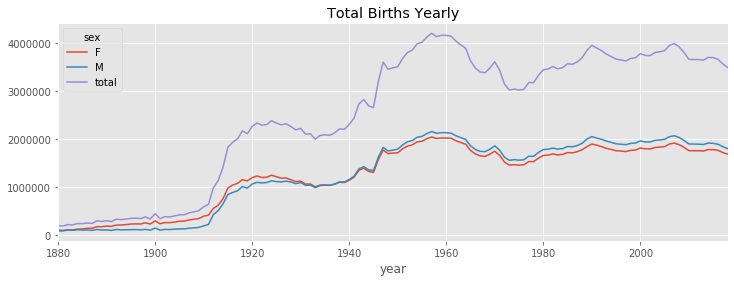

In [8]:
#Observing the total births by sex and year.
#total_births_sex.plot(title = 'Total Births by sex and year')
total_births_sex.plot(title='Total Births Yearly', figsize=(12, 4))
plt.show()

In [9]:
"""
identifying the proportion of babies yearly based on sex given a particular name
"""

def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names_prop = names_data.groupby(['year','sex']).apply(add_prop)

names_prop

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1955713,Zylas,M,5,2018,0.000003
1955714,Zyran,M,5,2018,0.000003
1955715,Zyrie,M,5,2018,0.000003
1955716,Zyron,M,5,2018,0.000003


In [10]:
#Sanity check
names_prop.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2016  M      1.0
2017  F      1.0
      M      1.0
2018  F      1.0
      M      1.0
Name: prop, Length: 278, dtype: float64

In [11]:
 #sorting values for ranks
def group_sorted(dff, col):
    dfff = dff.sort_values(by = ['year', 'sex', col], ascending = False)
    return dfff

In [12]:
names_prop_sorted = group_sorted(names_data, "births")
names_prop_sorted

,name,sex,births,year
1941714,Liam,M,19837,2018
1941715,Noah,M,18267,2018
1941716,William,M,14516,2018
1941717,James,M,13525,2018
1941718,Oliver,M,13389,2018
...,...,...,...,...
937,Ula,F,5,1880
938,Vannie,F,5,1880
939,Verona,F,5,1880
940,Vertie,F,5,1880


In [13]:
#setting {sex, year, name} as index to names_data
names_data_indexed = names_data.set_index(['sex', 'name', 'year']).sort_index()
names_data_indexed

births
sex name   year        
F   Aabha  2011       7
           2012       5
           2014       9
           2015       7
           2016       7
...                 ...
M   Zyvion 2009       5
    Zyvon  2015       7
    Zyyon  2014       6
    Zzyzx  2010       5
           2018       5

[1955718 rows x 1 columns]

In [14]:
# Fuction to rank the names given sex and year
def names_ranked(sex, year):
    dff = names_data_indexed.loc[sex, : , year].sort_values("births", ascending=False).reset_index()
    dff = dff.drop(['sex', 'year'], axis=1)
    dff.columns = [year, 'births']
    dff.index = dff.index + 1
        
    return dff

In [15]:
names_ranked('F', 2018)

,2018,births
1,Emma,18688
2,Olivia,17921
3,Ava,14924
4,Isabella,14464
5,Sophia,13928
...,...,...
18025,Joniya,5
18026,Jonier,5
18027,Jomana,5
18028,Joline,5


In [16]:
#getting ranks of names within a range of years
def ranks_ranged(sex, year0, year1):
    years_rnge = [names_ranked(sex, year) for year in range(year0, year1 + 1)]
    
    return pd.concat(years_rnge, axis=1).fillna(0)
    

In [17]:
ranks_ranged('F', 2015, 2018)

,2015,births,2016,births,2017,births,2018,births
1,Emma,20455,Emma,19496.0,Emma,19800.0,Emma,18688.0
2,Olivia,19691,Olivia,19365.0,Olivia,18703.0,Olivia,17921.0
3,Sophia,17417,Ava,16302.0,Ava,15958.0,Ava,14924.0
4,Ava,16378,Sophia,16128.0,Isabella,15180.0,Isabella,14464.0
5,Isabella,15617,Isabella,14795.0,Sophia,14883.0,Sophia,13928.0
...,...,...,...,...,...,...,...,...
19087,Laurina,5,0,0.0,0,0.0,0,0.0
19088,Laurianne,5,0,0.0,0,0.0,0,0.0
19089,Laurelle,5,0,0.0,0,0.0,0,0.0
19090,Laurelin,5,0,0.0,0,0.0,0,0.0


In [18]:
#top n in a year
def top_n_ranked(n, sex, year):
    return names_ranked(sex, year)[:n]

In [19]:
top_n_ranked(15, "F", 2010)

,2010,births
1,Isabella,22731
2,Sophia,20477
3,Emma,17179
4,Olivia,16860
5,Ava,15300
6,Emily,14172
7,Abigail,14124
8,Madison,13070
9,Chloe,11656
10,Mia,10541


In [24]:
#top n over range of years
def top_ns_ranked(n, sex, year0, year1):
    dff = [top_n_ranked(n, sex, year) for year in range(year0, year1)]
    return pd.concat(dff, axis=1)

In [25]:
top_ns_ranked(15, 'M', 2015,2018)

,2015,births,2016,births,2017,births
1,Noah,19635,Noah,19117,Liam,18798
2,Liam,18374,Liam,18218,Noah,18410
3,Mason,16627,William,15761,William,14967
4,Jacob,15949,Mason,15244,James,14291
5,William,15909,James,14862,Logan,14014
6,Ethan,15077,Benjamin,14641,Benjamin,13797
7,James,14824,Jacob,14510,Mason,13549
8,Alexander,14547,Michael,14088,Elijah,13344
9,Michael,14431,Elijah,13902,Oliver,13193
10,Benjamin,13700,Ethan,13819,Jacob,13178


In [73]:
def names_unranked(sex, year):
    dff = names_data_indexed.loc[sex, : , year] .reset_index()
    dff = dff.drop(['sex', 'year'], axis=1)
    dff.index = dff.name
    
    dfff = dff.drop('name', axis=1)
    dfff.index.name = 'names'
    dfff.columns.name = 'years'      
    
    return dfff

In [74]:
names_unranked('M', 2011)

years,births
names,
Aaban,11
Aadam,17
Aadan,11
Aadarsh,7
Aaden,275
...,...
Zyrion,12
Zyron,17
Zyshawn,5


In [77]:
def unranked_ranged(sex, year0, year1):
    years_rnge = [names_unranked(sex, year) for year in range(year0, year1 + 1)]
    
    return pd.concat(years_rnge, axis=1, sort=True).fillna(0) 

In [79]:
unranked_ranged('M', 2010, 2018)

years,births,births,births,births,births,births,births,births,births
Aaban,9.0,11.0,11.0,14.0,16.0,15.0,9.0,11.0,7.0
Aabid,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0
Aabir,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0
Aadam,7.0,17.0,11.0,16.0,19.0,22.0,18.0,18.0,19.0
Aadan,11.0,11.0,11.0,13.0,8.0,10.0,0.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...
Zytavious,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zyus,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,6.0
Zyvon,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
Zyyon,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0


In [68]:
unranked_grp('M', 2011, 2013)

,2011,2012,name
0,0.0,0.0,AabanAabanAaban
1,0.0,0.0,AadamAadamAadam
2,0.0,0.0,AadanAadanAadan
3,0.0,0.0,AadarshAadarshAadarsh
4,0.0,0.0,AadenAadenAaden
...,...,...,...
14340,0.0,0.0,0
14341,0.0,0.0,0
14342,0.0,0.0,0
14343,0.0,0.0,0


In [29]:
"""
The function accepts sex, and year ranges i.e. cum_range('M', 2010, 2018) then returns unique names ranked in index and 
by cummulative births within that year range.
"""

def cum_range(sex, year0, year1):
    dff = names_data_indexed.loc[sex, : , year].reset_index()
    dff = dff.drop(['sex', 'year'], axis=1)
    dff.columns = ['name999', 'births']
    dff.index = dff.index + 1
    
    return dff

In [30]:
cum_range('F', 2015, 2016)

,2018,births
1,Aabidah,5
2,Aabriella,6
3,Aada,8
4,Aadaya,8
5,Aadhira,30
...,...,...
18025,Zyra,57
18026,Zyrah,18
18027,Zyria,6
18028,Zyriah,22


In [69]:
#Sets of unique names from numpy ndarray
unik_names_list=set(names_data['name'].unique())
fmale_names_list= set(names_data[names_data['sex']=='F']['name'].unique())
male_names_list= set(names_data[names_data['sex']=='M']['name'].unique())
bisex_names_list = fmale_names_list & male_names_list #intersection
unix_fmale_list = fmale_names_list - bisex_names_list #set difference
unix_male_list = male_names_list - bisex_names_list # set difference
unix_list = unix_fmale_list | unix_male_list # union

In [70]:
#unique names statistics
ttal_unik_names=len(unik_names_list)
fmale_names=len(fmale_names_list)
male_names=len(male_names_list)
bisex_names = len(bisex_names_list)


print("Total Unique names: {0} \n\nTotal Female Names: {1} \nTotal Male Names: {2}\n\nTotal Bisexual Names: {3}"
      .format(ttal_unik_names, fmale_names, male_names, bisex_names ))


unix_fmale_names = len(unix_fmale_list)
unix_male_names = len(unix_male_list)
unix_names = len(unix_list)

print("\n\nUni-sex Female Names: {0} \nUni-sex Male Names: {1} \nTotal Unisex Names: {2}"
      .format(unix_fmale_names, unix_male_names, unix_names))

Total Unique names: 98297 

Total Female Names: 67644 
Total Male Names: 41419

Total Bisexual Names: 10766


Uni-sex Female Names: 56878 
Uni-sex Male Names: 30653 
Total Unisex Names: 87531


In [71]:
#Checking popularity of names based by births disregarding sex. Implemented by groupby() 
unique_names_births = names_prop.groupby('name').births.sum()

unique_names_births

name
Aaban      114
Aabha       35
Aabid       16
Aabidah      5
Aabir       10
          ... 
Zyvion       5
Zyvon        7
Zyyanna      6
Zyyon        6
Zzyzx       10
Name: births, Length: 98297, dtype: int64

In [72]:
#Checking popularity of names based by births with regards to sex. Implemented by groupby() 
unique_names_births1 = names_prop.groupby(['name', 'sex']).births.sum()

unique_names_births1

name     sex
Aaban    M      114
Aabha    F       35
Aabid    M       16
Aabidah  F        5
Aabir    M       10
               ... 
Zyvion   M        5
Zyvon    M        7
Zyyanna  F        6
Zyyon    M        6
Zzyzx    M       10
Name: births, Length: 109063, dtype: int64

In [73]:
#Checking unique names separating with sex

unique_names_births2 = names_data.pivot_table('births', index='name', columns='sex', aggfunc = 'sum', fill_value=0)

unique_names_births2

sex,F,M
name,,
Aaban,0,114
Aabha,35,0
Aabid,0,16
Aabidah,5,0
Aabir,0,10
...,...,...
Zyvion,0,5
Zyvon,0,7
Zyyanna,6,0


In [74]:
#Unique names frequencies yearly between 1880-2018 : A period of 139 years. Max Freq: 139 *2 = 279; minimum: 1
unique_names_freq = names_data['name'].value_counts()

unique_names_freq

Joseph     278
John       278
William    278
Marion     278
Jesse      278
          ... 
Piilani      1
Jasonjr      1
Tobye        1
Aurin        1
Jalieah      1
Name: name, Length: 98297, dtype: int64

In [75]:
#Most frequent names per year
unique_names_freq.head(20)

Joseph       278
John         278
William      278
Marion       278
Jesse        278
Sidney       278
Francis      278
Leslie       278
Lee          278
Tommie       278
Jessie       278
Jean         278
James        278
Johnnie      278
Ollie        278
Charles      277
Henry        277
June         277
Charlie      277
Elizabeth    276
Name: name, dtype: int64

In [76]:
#least frequent names per year
unique_names_freq.tail(10)

Ahkeelah      1
Chardarius    1
Derrione      1
Tshanti       1
Maynie        1
Piilani       1
Jasonjr       1
Tobye         1
Aurin         1
Jalieah       1
Name: name, dtype: int64

In [77]:
unique_names_births2['frequency'] = unique_names_freq

unique_names_births2

sex,F,M,frequency
name,,,
Aaban,0,114,11
Aabha,35,0,5
Aabid,0,16,3
Aabidah,5,0,1
Aabir,0,10,2
...,...,...,...
Zyvion,0,5,1
Zyvon,0,7,1
Zyyanna,6,0,1


In [78]:
unique_names_births2.sort_values(by='frequency', ascending=False)

sex,F,M,frequency
name,,,
Sidney,23771,83078,278
Marion,188348,72028,278
Jean,457774,23985,278
Francis,29185,285706,278
Joseph,10652,2611575,278
...,...,...,...
Jollette,5,0,1
Sharlayne,6,0,1
Jolysa,5,0,1


In [79]:
#check for name's details.
def name_info(name):
    name_det=''
    if name in unik_names_list:
        name_det = unique_names_births2.transpose()[name]
    else:
        name_det='Name not listed'
        
    return name_det

name_info('Vinny')

sex
F               0
M            1021
frequency      57
Name: Vinny, dtype: int64

In [80]:
#getting the most frequent names
def most_freq(dff):
    
    return dff[dff.frequency == 178]
    
    
most_freq_nms = most_freq(unique_names_births2)
most_freq_nms

sex,F,M,frequency
name,,,
Byron,298,80160,178
Caleb,594,283375,178
Hannah,433062,694,178
Jaime,49737,68077,178
Janie,74592,276,178
Mallie,3117,402,178
Mamie,77749,278,178
Murphy,1386,6677,178
Winfred,351,10082,178


In [81]:
#get list
def get_list(dff):
    return list(dff.index)

In [82]:
# The most frequent names
most_freq_names = get_list(most_freq_nms)
most_freq_names

['Byron',
 'Caleb',
 'Hannah',
 'Jaime',
 'Janie',
 'Mallie',
 'Mamie',
 'Murphy',
 'Winfred']

In [83]:
# Total births by name and year
total_births_name = names_data.pivot_table('births', index='year', columns='name', aggfunc='sum')

In [84]:
#subset names trend plotting
def subset_line_plot( list, description):
    dff = total_births_name[list]
    dff.plot(figsize = (12, 6), grid = False, title = description)
    return plt.show()
    

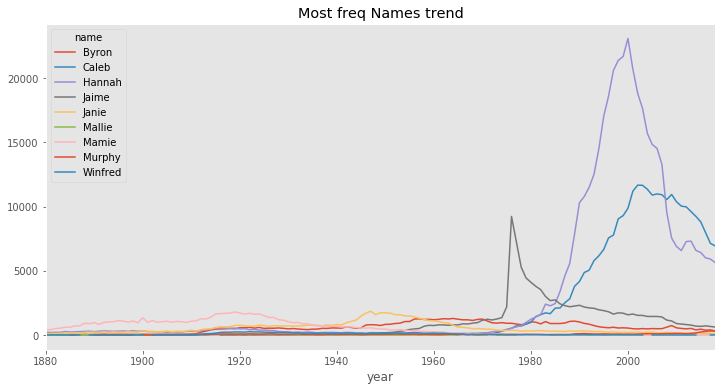

In [85]:
#Checking the naming trends for the most frequent names
subset_line_plot(most_freq_names, "Most freq Names trend")

In [86]:
#least frequent names
def least_freq(dff):
    return dff[dff.frequency == 1]

least_freq_nms = least_freq(unique_names_births2)
least_freq_nms

sex,F,M,frequency
name,,,
Aabidah,5,0,1
Aadaya,8,0,1
Aadhiran,0,6,1
Aadhyareddy,6,0,1
Aadhyasri,6,0,1
...,...,...,...
Zytavion,0,5,1
Zyvion,0,5,1
Zyvon,0,7,1


In [87]:
#The least frequent names
least_freq_names = get_list(least_freq_nms)
least_freq_names

['Aabidah',
 'Aadaya',
 'Aadhiran',
 'Aadhyareddy',
 'Aadhyasri',
 'Aadian',
 'Aadilynn',
 'Aadrian',
 'Aadvi',
 'Aadyant',
 'Aafia',
 'Aafreen',
 'Aage',
 'Aagna',
 'Aagot',
 'Aahir',
 'Aahron',
 'Aaiyana',
 'Aaja',
 'Aajon',
 'Aakif',
 'Aakira',
 'Aakiyah',
 'Aalaiya',
 'Aalam',
 'Aalap',
 'Aalasia',
 'Aalayjah',
 'Aalea',
 'Aaleayah',
 'Aaleena',
 'Aaleeya',
 'Aaleiah',
 'Aalena',
 'Aalexus',
 'Aali',
 'Aalias',
 'Aalicia',
 'Aalieyah',
 'Aalilah',
 'Aalinah',
 'Aalisa',
 'Aaliyaa',
 'Aaliyanna',
 'Aallyah',
 'Aalon',
 'Aaloni',
 'Aalyia',
 'Aalyna',
 'Aalysia',
 'Aalyvia',
 'Aamar',
 'Aamora',
 'Aamorah',
 'Aanijah',
 'Aanik',
 'Aanyla',
 'Aapri',
 'Aaradhy',
 'Aaraiz',
 'Aaraon',
 'Aaratrika',
 'Aaravreddy',
 'Aaraya',
 'Aareona',
 'Aariella',
 'Aarien',
 'Aariketh',
 'Aariyona',
 'Aariyonna',
 'Aaroh',
 'Aarona',
 'Aaronae',
 'Aaronda',
 'Aaronisha',
 'Aaronjacob',
 'Aaronjoseph',
 'Aaronjosh',
 'Aaronlee',
 'Aaroosh',
 'Aarren',
 'Aarshiya',
 'Aarunya',
 'Aarushreddy',
 'Aarvik'

In [88]:
#bisexual names
def bi_names(dff):
    return dff[(dff.F > 0) & (dff.M > 0)]

bi_sx_names= bi_names(unique_names_births2)
bi_sx_names

sex,F,M,frequency
name,,,
Aaden,5,4819,19
Aadi,16,851,19
Aadyn,16,516,18
Aalijah,148,212,36
Aaliyah,87327,96,56
...,...,...,...
Zyion,168,916,34
Zyon,619,2632,43
Zyonn,5,40,6


In [89]:
#done initially
bisex_names_list

{'Kaylin',
 'Stav',
 'Brian',
 'Davin',
 'Hazell',
 'Kaydyn',
 'Ashlen',
 'Glady',
 'Janette',
 'Elmore',
 'Trayce',
 'Felton',
 'Mirza',
 'Rashone',
 'Kelyn',
 'Demetrious',
 'Simranjit',
 'Trista',
 'Ratha',
 'Diarra',
 'Bradley',
 'Ryden',
 'Rashon',
 'Carlee',
 'Zyaire',
 'Rickey',
 'Theron',
 'Yuki',
 'Alexie',
 'Evelin',
 'Jatori',
 'Riely',
 'Shaquelle',
 'Santonia',
 'Wandell',
 'Rashan',
 'Curran',
 'Sadi',
 'Tomiko',
 'Darrell',
 'Jeannie',
 'Kalle',
 'Larie',
 'Giovanny',
 'Diane',
 'Demari',
 'Johnnye',
 'Jennifer',
 'Coi',
 'Jahlani',
 'Amel',
 'Warren',
 'Harjot',
 'Khamari',
 'Jonnie',
 'Cledith',
 'Emel',
 'Jemiah',
 'Percy',
 'Suzanne',
 'Wilder',
 'Admire',
 'Keilan',
 'Linder',
 'Roye',
 'Socorro',
 'Tajay',
 'Karen',
 'Yuma',
 'Quay',
 'Elyse',
 'Yaritza',
 'Jesy',
 'Seton',
 'Najai',
 'Angie',
 'Everette',
 'Noa',
 'Jonnah',
 'Shavontae',
 'Jamaica',
 'Kenya',
 'Jovani',
 'Niki',
 'Dymond',
 'Majesty',
 'Konya',
 'Keonta',
 'Argie',
 'Carla',
 'Vergil',
 'Emmanuel'

In [90]:
#bisexual ordered by frequency
bi_sx_names.sort_values(by='frequency', ascending=False)

sex,F,M,frequency
name,,,
Leslie,266992,112676,278
Marion,188348,72028,278
Tommie,17411,34188,278
Jesse,12013,418391,278
Jessie,167405,110149,278
...,...,...,...
Challie,5,5,2
Chaffee,5,5,2
Sitha,8,5,2


In [91]:
#bisexual mainly males
bi_sx_names.sort_values(by='M', ascending=False)

sex,F,M,frequency
name,,,
James,23398,5161904,278
John,21686,5122397,278
Robert,20095,4818046,275
Michael,21731,4360596,251
William,15953,4115428,278
...,...,...,...
Timi,649,5,39
Elner,393,5,37
Ellyot,10,5,3


In [92]:
#top 20 male bisexual names
bi_sx_names.sort_values(by='M', ascending=False).head(20)

sex,F,M,frequency
name,,,
James,23398,5161904,278
John,21686,5122397,278
Robert,20095,4818046,275
Michael,21731,4360596,251
William,15953,4115428,278
David,12908,3619087,261
Joseph,10652,2611575,278
Richard,9539,2564184,259
Charles,12421,2391723,277


In [93]:
#bisexual mainly females
bi_sx_names.sort_values(by='F', ascending=False)

sex,F,M,frequency
name,,,
Mary,4124368,15150,269
Elizabeth,1637444,5178,276
Patricia,1571696,4964,220
Jennifer,1466897,4832,166
Linda,1452281,3756,203
...,...,...,...
Jashan,5,231,22
Jassiel,5,439,26
Javin,5,2209,47


In [94]:
#top 20 bisexual female names
bi_sx_names.sort_values(by='F', ascending=False).head(20)

sex,F,M,frequency
name,,,
Mary,4124368,15150,269
Elizabeth,1637444,5178,276
Patricia,1571696,4964,220
Jennifer,1466897,4832,166
Linda,1452281,3756,203
Barbara,1433845,4139,218
Margaret,1248737,3743,258
Susan,1121353,2544,206
Dorothy,1107427,3674,220


In [95]:
#most freq bi_names

most_freq_bi_names = most_freq(bi_sx_names)
most_freq_bi_names

sex,F,M,frequency
name,,,
Byron,298,80160,178
Caleb,594,283375,178
Hannah,433062,694,178
Jaime,49737,68077,178
Janie,74592,276,178
Mallie,3117,402,178
Mamie,77749,278,178
Murphy,1386,6677,178
Winfred,351,10082,178


In [96]:
most_freq_bi_nams_list = get_list(most_freq_bi_names)
most_freq_bi_nams_list

['Byron',
 'Caleb',
 'Hannah',
 'Jaime',
 'Janie',
 'Mallie',
 'Mamie',
 'Murphy',
 'Winfred']

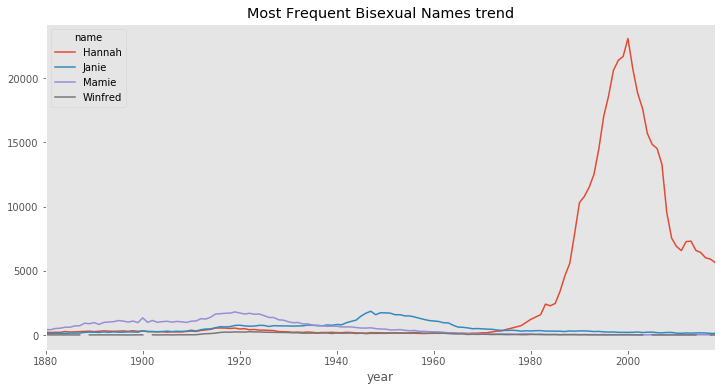

In [97]:
#Trend for the most frequent bisexual names
subset_line_plot(most_freq_bi_nams_list[2::2], "Most Frequent Bisexual Names trend")

In [98]:
#single gender names
def uni_sex_nam(dff):
    return dff[(dff.F == 0) | (dff.M == 0)]

uni_sex_names = uni_sex_nam(unique_names_births2)
uni_sex_names

sex,F,M,frequency
name,,,
Aaban,0,114,11
Aabha,35,0,5
Aabid,0,16,3
Aabidah,5,0,1
Aabir,0,10,2
...,...,...,...
Zyvion,0,5,1
Zyvon,0,7,1
Zyyanna,6,0,1


In [99]:
#most frequent unisex names
uni_sex_names.sort_values(by='frequency', ascending=False)

sex,F,M,frequency
name,,,
Helene,33066,0,139
Magdalene,9110,0,139
Henderson,0,3891,139
West,0,2895,139
Annabel,13899,0,139
...,...,...,...
Lashune,8,0,1
Qiarah,5,0,1
Lashunti,5,0,1


In [100]:
#males unisex names
def uni_sex_males(dff):
    return dff[(dff.M > 0) & (dff.F == 0)]

males_nams = uni_sex_males(unique_names_births2)
males_nams

sex,F,M,frequency
name,,,
Aaban,0,114,11
Aabid,0,16,3
Aabir,0,10,2
Aadam,0,273,27
Aadan,0,130,11
...,...,...,...
Zyus,0,11,2
Zyvion,0,5,1
Zyvon,0,7,1


In [101]:
#order males names by frequency
males_nams.sort_values(by='frequency', ascending=False)

sex,F,M,frequency
name,,,
Enoch,0,10781,139
Sampson,0,3607,139
Richmond,0,4179,139
Angus,0,6235,139
Baxter,0,3761,139
...,...,...,...
Dylhan,0,7,1
Rimantas,0,6,1
Dyllian,0,5,1


In [102]:
#most frequently used unisexual names
def mst_freq_unix_names(dff):
    return dff[dff.frequency == 139]

#most freq male names
most_freq_m_names = mst_freq_unix_names(males_nams)
most_freq_m_names

sex,F,M,frequency
name,,,
Abe,0,9215,139
Abner,0,7822,139
Abram,0,17065,139
Aloysius,0,5590,139
Alphonse,0,10235,139
Ambrose,0,8560,139
Angus,0,6235,139
Baxter,0,3761,139
Benjiman,0,4211,139


In [103]:
# most freq male names
most_freq_ml_names = get_list(most_freq_m_names)
most_freq_ml_names

['Abe',
 'Abner',
 'Abram',
 'Aloysius',
 'Alphonse',
 'Ambrose',
 'Angus',
 'Baxter',
 'Benjiman',
 'Buck',
 'Casper',
 'Cliff',
 'Emmitt',
 'Enoch',
 'Enos',
 'Ferdinand',
 'Frederic',
 'Fritz',
 'Gustav',
 'Gustave',
 'Hamilton',
 'Henderson',
 'Herschel',
 'Hiram',
 'Ike',
 'Jefferson',
 'Josh',
 'Judson',
 'Junius',
 'Lemuel',
 'Lucius',
 'Napoleon',
 'Nels',
 'Orrin',
 'Oswald',
 'Richmond',
 'Sampson',
 'Sanford',
 'Webster',
 'West',
 'Zack']

**Plotting subsets of most frequent names at various intervals to observe common trends.**

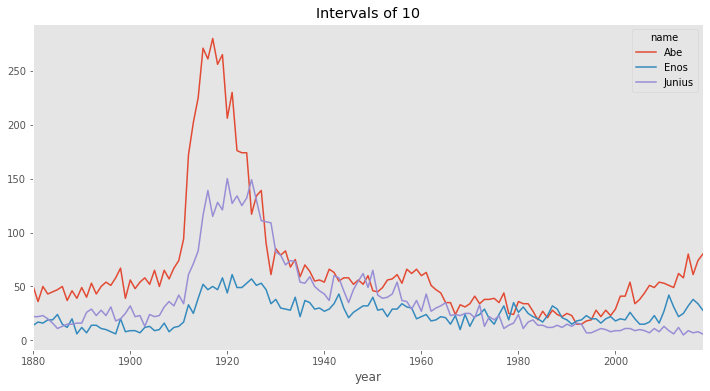

In [104]:
subset_line_plot(most_freq_ml_names[::14], "Intervals of 10")

In [105]:
most_freq_m_names.sort_values(by='M', ascending=False)

sex,F,M,frequency
name,,,
Jefferson,0,22032,139
Abram,0,17065,139
Josh,0,16585,139
Sanford,0,14935,139
Frederic,0,14154,139
Hiram,0,13746,139
Judson,0,12036,139
Emmitt,0,10931,139
Enoch,0,10781,139


In [106]:
#LEAST frequently unisex name
def least_freq_unix_names(dff):
    return dff[dff.frequency == 1]

In [107]:
least_freq_m_names = least_freq_unix_names(males_nams)
least_freq_m_names

sex,F,M,frequency
name,,,
Aadhiran,0,6,1
Aadian,0,5,1
Aadrian,0,7,1
Aadyant,0,6,1
Aage,0,7,1
...,...,...,...
Zytaevius,0,5,1
Zytavion,0,5,1
Zyvion,0,5,1


In [108]:
least_freq_m_names.sort_values(by='M', ascending=False)

sex,F,M,frequency
name,,,
Christop,0,1082,1
Jahseh,0,65,1
Jometh,0,23,1
Thielen,0,21,1
Jersen,0,21,1
...,...,...,...
Daigon,0,5,1
Daiguan,0,5,1
Khaliek,0,5,1


In [109]:
males_nams.sort_values(by='M', ascending=False)

sex,F,M,frequency
name,,,
Jakob,0,30322,60
Jefferson,0,22032,139
Rodger,0,21436,119
Tobias,0,20419,124
Romeo,0,19586,128
...,...,...,...
Jaterious,0,5,1
Darries,0,5,1
Darrione,0,5,1


In [110]:
#unisex females
def uni_sex_fmales(dff):
    return dff[(dff.M == 0) & (dff.F > 0)]

fmale_nams = uni_sex_fmales(unique_names_births2)
fmale_nams

sex,F,M,frequency
name,,,
Aabha,35,0,5
Aabidah,5,0,1
Aabriella,38,0,6
Aada,13,0,2
Aadaya,8,0,1
...,...,...,...
Zyrielle,27,0,4
Zyrihanna,45,0,7
Zyriyah,16,0,3


In [111]:
#inisex female names ordered by frequency
fmale_nams.sort_values(by='frequency', ascending=False)

sex,F,M,frequency
name,,,
Agatha,8691,0,139
Annetta,8757,0,139
Magdalene,9110,0,139
Dorcas,7057,0,139
Adella,5509,0,139
...,...,...,...
Enchante,6,0,1
Enaysia,5,0,1
Enari,5,0,1


In [112]:
#inisex female names ordered by popularity
fmale_nams.sort_values(by='F', ascending=False)

sex,F,M,frequency
name,,,
Delilah,39884,0,139
Helena,35540,0,139
Athena,33762,0,109
Brielle,33297,0,44
Helene,33066,0,139
...,...,...,...
Evalean,5,0,1
Nylarose,5,0,1
Evalei,5,0,1


In [113]:
#most freq females
most_freq_fm_names = mst_freq_unix_names(fmale_nams)
most_freq_fm_names

sex,F,M,frequency
name,,,
Adela,12636,0,139
Adelaide,27122,0,139
Adelia,5127,0,139
Adella,5509,0,139
Agatha,8691,0,139
Alida,4462,0,139
Amalia,12707,0,139
Annabel,13899,0,139
Annetta,8757,0,139


In [114]:
most_freq_fm_names.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, Adela to Winona
Data columns (total 3 columns):
F            60 non-null int64
M            60 non-null int64
frequency    60 non-null int64
dtypes: int64(3)
memory usage: 1.9+ KB


In [115]:
most_freq_fm_names_list = get_list(most_freq_fm_names)
most_freq_fm_names_list

['Adela',
 'Adelaide',
 'Adelia',
 'Adella',
 'Agatha',
 'Alida',
 'Amalia',
 'Annabel',
 'Annetta',
 'Aurelia',
 'Belle',
 'Berta',
 'Catharine',
 'Cordelia',
 'Corrine',
 'Delilah',
 'Dorcas',
 'Eleanore',
 'Elinor',
 'Emelia',
 'Emmie',
 'Eve',
 'Fanny',
 'Frieda',
 'Georgiana',
 'Georgianna',
 'Helena',
 'Helene',
 'Inga',
 'Juliet',
 'Katheryn',
 'Kathrine',
 'Kathryne',
 'Kitty',
 'Lavina',
 'Lavinia',
 'Leda',
 'Lelia',
 'Lenna',
 'Leonora',
 'Lida',
 'Lilian',
 'Lucie',
 'Magdalene',
 'Malinda',
 'Malissa',
 'Margret',
 'Marietta',
 'Minerva',
 'Nona',
 'Phebe',
 'Rosalia',
 'Rosina',
 'Rowena',
 'Sabina',
 'Susanna',
 'Tressa',
 'Una',
 'Vina',
 'Winona']

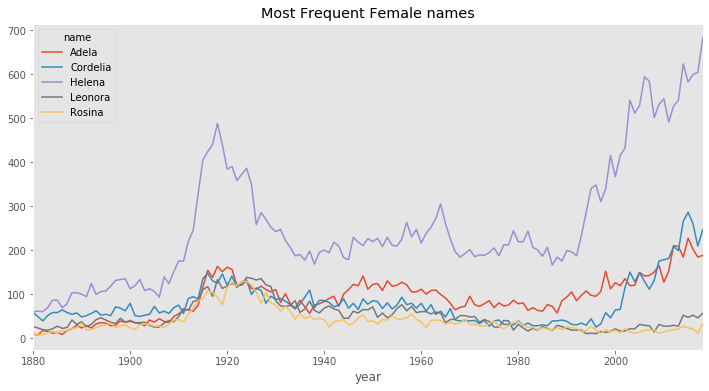

In [116]:
subset_line_plot(most_freq_fm_names_list[::13], "Most Frequent Female names")

In [117]:
#least frequently used female names

least_freq_fm_names = least_freq_unix_names(fmale_nams)
least_freq_fm_names

sex,F,M,frequency
name,,,
Aabidah,5,0,1
Aadaya,8,0,1
Aadhyareddy,6,0,1
Aadhyasri,6,0,1
Aadilynn,5,0,1
...,...,...,...
Zynlee,5,0,1
Zynovia,6,0,1
Zyrhiana,6,0,1


In [118]:
unique_names_births2['F_M_total'] = unique_names_births2.F + unique_names_births2.M

unique_names_births2

sex,F,M,frequency,F_M_total
name,,,,
Aaban,0,114,11,114
Aabha,35,0,5,35
Aabid,0,16,3,16
Aabidah,5,0,1,5
Aabir,0,10,2,10
...,...,...,...,...
Zyvion,0,5,1,5
Zyvon,0,7,1,7
Zyyanna,6,0,1,6


In [119]:
#Most used names
def most_used_names(dff):
    return dff[dff.F_M_total >= 1000000]

mst_used_nms = most_used_names(unique_names_births2).sort_values(by='F_M_total', ascending=False)
mst_used_nms

sex,F,M,frequency,F_M_total
name,,,,
James,23398,5161904,278,5185302
John,21686,5122397,278,5144083
Robert,20095,4818046,275,4838141
Michael,21731,4360596,251,4382327
Mary,4124368,15150,269,4139518
William,15953,4115428,278,4131381
David,12908,3619087,261,3631995
Joseph,10652,2611575,278,2622227
Richard,9539,2564184,259,2573723


In [120]:
most_used_names(unique_names_births2).info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Andrew to William
Data columns (total 4 columns):
F            42 non-null int64
M            42 non-null int64
frequency    42 non-null int64
F_M_total    42 non-null int64
dtypes: int64(4)
memory usage: 1.6+ KB


In [121]:
mst_used_names_list = get_list(mst_used_nms)
mst_used_names_list

['James',
 'John',
 'Robert',
 'Michael',
 'Mary',
 'William',
 'David',
 'Joseph',
 'Richard',
 'Charles',
 'Thomas',
 'Christopher',
 'Daniel',
 'Elizabeth',
 'Matthew',
 'Patricia',
 'George',
 'Jennifer',
 'Linda',
 'Anthony',
 'Barbara',
 'Donald',
 'Paul',
 'Mark',
 'Edward',
 'Andrew',
 'Steven',
 'Kenneth',
 'Margaret',
 'Joshua',
 'Kevin',
 'Brian',
 'Susan',
 'Dorothy',
 'Ronald',
 'Sarah',
 'Timothy',
 'Jessica',
 'Jason',
 'Helen',
 'Nancy',
 'Betty']

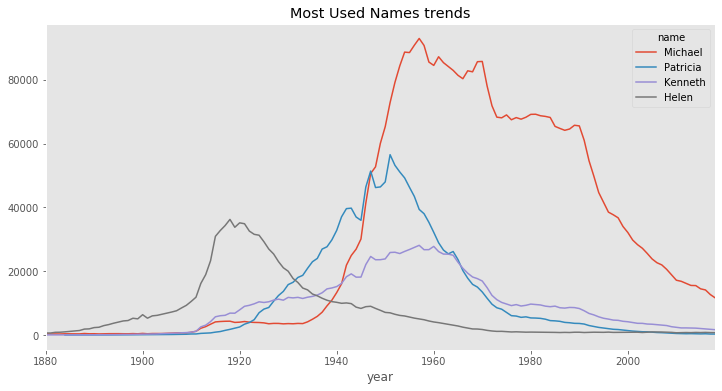

In [122]:
#subplot for some of the most used named
subset_line_plot(mst_used_names_list[3 ::12], "Most Used Names trends")

In [123]:
#least used names
def least_used_names(dff):
    return dff[dff.F_M_total <= 139]

least_usd_names = least_used_names(unique_names_births2).sort_values(by='F_M_total', ascending=False)
least_usd_names

sex,F,M,frequency,F_M_total
name,,,,
Kizer,0,139,14,139
Almendra,139,0,17,139
Coulton,0,139,17,139
Kyriana,139,0,18,139
Abbagale,139,0,17,139
...,...,...,...,...
Semarias,0,5,1,5
Semayah,5,0,1,5
Kadria,5,0,1,5


In [124]:
#least used names list
least_used_names_list = get_list(least_usd_names)
least_used_names_list

['Kizer',
 'Almendra',
 'Coulton',
 'Kyriana',
 'Abbagale',
 'Ahsha',
 'Avarey',
 'Jonluke',
 'Emauri',
 'Masiel',
 'Kinsie',
 'Boluwatife',
 'Harce',
 'Annsleigh',
 'Corisa',
 'Shamarie',
 'Shynia',
 'Dajanay',
 'Yordan',
 'Gwenlyn',
 'Shamina',
 'Jamarii',
 'Aneliese',
 'Sanjuan',
 'Marializ',
 'Kinston',
 'Talli',
 'Wasim',
 'Koralyn',
 'Tanaka',
 'Rhodie',
 'Alrick',
 'Porschea',
 'Shelbylynn',
 'Viera',
 'Jaydalynn',
 'Alsie',
 'Lexandra',
 'Gracynn',
 'Isabellarose',
 'Sitlali',
 'Sibbie',
 'Itha',
 'Quinnlan',
 'Paislynn',
 'Kabella',
 'Axtyn',
 'Zierra',
 'Robey',
 'Windie',
 'Madalen',
 'Carold',
 'Hazley',
 'Namiah',
 'Mckensi',
 'Elisah',
 'Yadir',
 'Vickii',
 'Shermeka',
 'Keimon',
 'Bellatrix',
 'Mayzee',
 'Mazey',
 'Rayneisha',
 'Keymoni',
 'Ryin',
 'Toniya',
 'Mackenzye',
 'Batina',
 'Kenidi',
 'Tiffay',
 'Alyla',
 'Jeanni',
 'Lacora',
 'Fountain',
 'Lashuna',
 'Kelsha',
 'Nimo',
 'Shaniquia',
 'Chala',
 'Neilani',
 'Elster',
 'Vanden',
 'Keen',
 'Eeva',
 'Damareon',
 'A

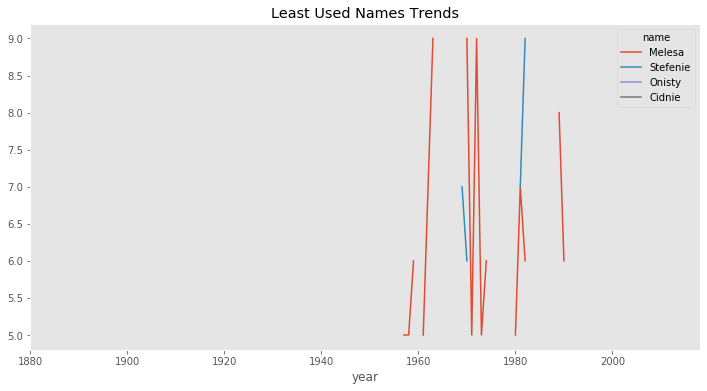

In [125]:
#subplot of some of the least used names
subset_line_plot(least_used_names_list[1000::18000], "Least Used Names Trends")

In [126]:
#def averagely used names
def avg_used_names(dff):
    return dff[(dff.F_M_total >= 10000) & (dff.F_M_total <= 1000000)]

avg_usd_names = avg_used_names(unique_names_births2).sort_values(by='F_M_total', ascending=False)
avg_usd_names

sex,F,M,frequency,F_M_total
name,,,,
Karen,985943,2771,212,988714
Jeffrey,3497,974486,175,977983
Lisa,965139,2785,160,967924
Ryan,23764,931339,164,955103
Jacob,2251,930300,199,932551
...,...,...,...,...
Gilda,10027,0,113,10027
Arlo,279,9744,128,10023
Antony,0,10013,109,10013


In [127]:
#averagely used names list
avg_used_names_list = get_list(avg_usd_names)
avg_used_names_list

['Karen',
 'Jeffrey',
 'Lisa',
 'Ryan',
 'Jacob',
 'Frank',
 'Gary',
 'Nicholas',
 'Anna',
 'Eric',
 'Sandra',
 'Ashley',
 'Stephen',
 'Emily',
 'Jonathan',
 'Kimberly',
 'Donna',
 'Ruth',
 'Carol',
 'Michelle',
 'Larry',
 'Laura',
 'Amanda',
 'Justin',
 'Raymond',
 'Scott',
 'Samuel',
 'Brandon',
 'Melissa',
 'Benjamin',
 'Rebecca',
 'Stephanie',
 'Deborah',
 'Sharon',
 'Kathleen',
 'Cynthia',
 'Gregory',
 'Jack',
 'Shirley',
 'Henry',
 'Amy',
 'Alexander',
 'Patrick',
 'Emma',
 'Angela',
 'Catherine',
 'Virginia',
 'Katherine',
 'Jerry',
 'Walter',
 'Dennis',
 'Brenda',
 'Tyler',
 'Pamela',
 'Frances',
 'Willie',
 'Nicole',
 'Christine',
 'Aaron',
 'Peter',
 'Samantha',
 'Evelyn',
 'Jose',
 'Rachel',
 'Alice',
 'Douglas',
 'Janet',
 'Carolyn',
 'Adam',
 'Kelly',
 'Harold',
 'Debra',
 'Nathan',
 'Martha',
 'Maria',
 'Marie',
 'Zachary',
 'Arthur',
 'Heather',
 'Terry',
 'Diane',
 'Joyce',
 'Julie',
 'Carl',
 'Jordan',
 'Grace',
 'Victoria',
 'Albert',
 'Kyle',
 'Joan',
 'Rose',
 'Jean

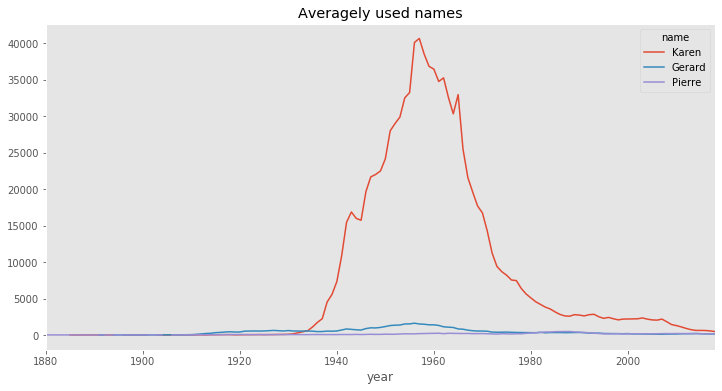

In [128]:
#subplot of some of the averagely used names
subset_line_plot(avg_used_names_list[::880], "Averagely used names")